# Logistical Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
import os
# Set directory
base_dir = './sets'
# Load validation set and test set
X_val = np.load(f'{base_dir}/X_val.npy')
y_val = np.load(f'{base_dir}/y_val.npy')
X_test = np.load(f'{base_dir}/X_test.npy')
over_sampled_best_X_test = np.load(f'{base_dir}/over_sampled_best_X_test.npy')
under_sampled_best_X_test = np.load(f'{base_dir}/under_sampled_best_X_test.npy')
y_test = np.load(f'{base_dir}/y_test.npy')

# make output directory
output_dir = './logistic_regression_out'
os.makedirs(output_dir, exist_ok=True)


# Hyper Tunning paramaters

In [30]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'saga', 'lbfgs']
            }

# Hyper Tunning to each specific set


## Base Set

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Base set
X_train = np.load(f'{base_dir}/X_train.npy')
y_train = np.load(f'{base_dir}/y_train.npy')

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')


os.makedirs(output_dir + '/base', exist_ok=True)

output = f'{output_dir}/base/'
# Save the model
import joblib
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
import json
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.998 total time=   0.8s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.999 total time=   0.9s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.999 total time=   1.2s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.998 total time=   1.4s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.998 total time=   1.2s
[CV 3/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.999 total time=   1.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.999 total time=   1.1s
[CV 2/5

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.999 total time=  13.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.999 total time=  14.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.998 total time=  15.7s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.998 total time=  15.9s
[CV 5/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.999 total time=  14.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.999 total time=  14.5s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.999 total time=   0.9s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.999 total time=  16.8s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.999 total time=   1.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.999 total time=  16.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.999 total time=   1.1s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.998 total time=  17.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.999 total time=  15.9s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.999 total time=   1.2s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.999 total time=   1.3s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.3s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.3s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.3s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.3s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.999 total time=  15.5s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.999 total time=   1.7s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.999 total time=   2.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.999 total time=  16.3s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.999 total time=   1.9s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.999 total time=   2.4s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.999 total time=   1.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.999 total time=  14.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.999 total time=  15.0s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.999 total time=  17.5s
[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.999 total time=  15.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.999 total time=  17.3s
[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.999 total time=  15.3s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.999 total time=  18.2s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.3s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.1s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.3s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.999 total time=  17.5s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.999 total time=  17.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.999 total time=  17.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.999 total time=  18.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.999 total time=  19.4s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.999 total time=   7.9s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.999 total time=   9.1s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.999 total time=   8.6s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.999 total time=   8.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.999 total time=  20.9s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.999 total time=  13.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.999 total time=  19.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.999 total time=  20.5s
[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.999 total time=  20.2s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.1s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.999 total time=  20.8s
[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.999 total time=  20.8s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.999 total time=   2.2s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.999 total time=   3.0s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.999 total time=   3.0s
[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.6s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.999 total time=  20.0s
[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.999 total time=  22.6s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.999 total time=   8.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.999 total time=  19.2s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.999 total time=  10.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.999 total time=  24.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.999 total time=  21.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.999 total time=  18.6s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.999 total time=  19.0s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.999 total time=  19.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.999 total time=  20.9s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.999 total time=  13.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.999 total time=  21.2s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.999 total time=   3.7s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.999 total time=   3.8s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.999 total time=  13.1s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.999 total time=   3.7s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.999 total time=   3.2s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.999 total time=   5.0s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.999 total time=  20.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.999 total time=  22.9s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.999 total time=   8.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.999 total time=  22.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.999 total time=  17.2s
[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.999 total time=  24.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.999 total time=  30.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.999 total time=  22.9s
[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.999 total time=  22.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.999 total time=  20.8s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.999 total time=  23.9s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.999 total time=   4.6s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.999 total time=  19.3s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.999 total time=  17.6s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.999 total time=   6.9s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.999 total time=   3.7s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.999 total time=  20.5s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.999 total time=   4.8s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.999 total time=   9.6s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.999 total time=  57.1s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 3/5] END ...C=10

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.999 total time=  26.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.999 total time=  27.4s
[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.999 total time=  23.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.999 total time=  29.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.999 total time=  34.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.999 total time=  22.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.999 total time=  23.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.999 total time=  24.4s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.999 total time=  18.0s
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.999 total time=  17.8s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.999 total time=  26.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.999 total time=  26.9s
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.999 total time=   4.2s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.999 total time=  22.0s
[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.999 total time=   4.9s
[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.999 total time=   4.1s
[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.999 total time=  20.9s
[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.999 total time=   4.6s
[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.999 total time=  11.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.999 total time=  25.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.999 total time=  26.0s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.999 total time=  28.5s
[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.999 total time=  20.9s
[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.7s
[CV 3/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s
[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.4s
[CV 5/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.999 total time=   0.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.999 total time=  27.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.999 total time=  17.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.999 total time=  15.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.999 total time=  16.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.999 total time=  16.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.999 total time=  15.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.999 total time= 4.0min


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/base.p

[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.999 total time= 6.5min
Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9992221434044716
Accuracy: 0.997054874097051


## Under Sampling - No Selection

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/under_sampled_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/under_sampled_no_selection', exist_ok=True)

output = f'{output_dir}/under_sampled_no_selection/'

# Save the model
import joblib
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
import json
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.494 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.506 total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.494 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.506 total time=   0.0s
[CV 2/5] END ...C=0.001, penalty

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projec

[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.911 total time=   0.0s

[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.911 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.933 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.933 total time=   0.0s
[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.933 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.978 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.933 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.922 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.978 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.922 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.922 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 5/5] END ...C=0.1, p

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projec


[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.922 total time=   0.0s
[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.944 total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.922 total time=   0.0s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.933 total time=   0.0s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.933 total time=   0.0s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.910 total time=   0.0s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.944 total time=   0.0s
[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=10, pen

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projec

[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.899 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.911 total time=   0.0s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.922 total time=   0.0s
[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.933 total time=   0.0s
[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.978 total time=   0.0s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.922 total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.910 total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.933 total time=   0.0s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.933 total time=   0.0s
[CV 5/5] END ....C=0.1, pe

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projec

Accuracy: 0.969302697778033


## Over Sampling - No Selection

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/over_sampled_X_train.npy')
y_train = np.load(f'{base_dir}/over_sampled_y_train.npy')

# cant concatenate the validation set because it is not over sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/over_sampled_no_selection', exist_ok=True)

output = f'{output_dir}/over_sampled_no_selection/'

# Save the model
import joblib
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
import json
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.2s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.2s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.945 total time=   2.2s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.946 total time=   2.9s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.945 total time=   3.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.945 total time=   3.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.945 total time=   3.1s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.947 total time=   3.6s
[CV 2/5] END C=0.001, penalty

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.956 total time=  30.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.953 total time=  26.4s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.955 total time=  26.9s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.952 total time=  24.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.955 total time=  24.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.955 total time=  29.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.955 total time=  25.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.953 total time=  26.2s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.954 total time=   3.9s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.951 total time=   4.2s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.954 total time=   3.7s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.954 total time=   3.6s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.952 total time=   3.4s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.0s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.952 total time=   0.7s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.3s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.954 total time=   5.4s
[CV 2/5] END .C=1, pena

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.953 total time=  28.2s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.954 total time=   6.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.954 total time=  28.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.954 total time=  28.3s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.954 total time=  29.8s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.954 total time=   5.1s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.956 total time=   6.4s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.954 total time=   2.3s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.951 total time=  25.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.954 total time=  24.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.952 total time=  29.0s
[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.952 total time=  24.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.954 total time=  25.0s
[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.954 total time=  25.9s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.954 total time=   3.1s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.956 total time=   3.6s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.954 total time=   3.6s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.954 total time=   4.5s
[CV 1/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.1s
[CV 2/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 3/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.2s
[CV 4/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.956 total time=   1.4s
[CV 5/5] END .....C=1, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.2s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.954 total time=   4.9s
[CV 2/5] END C=10, penalty=l

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l1, solver=saga;, score=0.951 total time=  27.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l1, solver=saga;, score=0.954 total time=  28.0s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.954 total time=   4.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.951 total time=  22.4s
[CV 3/5] END ......C=1, penalty=l1, solver=saga;, score=0.954 total time=  27.4s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l1, solver=saga;, score=0.954 total time=  28.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l1, solver=saga;, score=0.952 total time=  28.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.954 total time=  23.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.954 total time=  25.2s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.954 total time=   3.4s
[CV 2/5] END C=10, penalty=l2, solver=liblinear;, score=0.954 total time=   3.6s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.954 total time=  26.3s
[CV 3/5] END C=10, penalty=l2, solver=liblinear;, score=0.954 total time=   4.4s
[CV 4/5] END C=10, penalty=l2, solver=liblinear;, score=0.956 total time=   3.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.952 total time=  25.1s
[CV 1/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 5/5] END C=10, penalty=l2, solver=liblinear;, score=0.954 total time=   3.3s
[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 3/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.2s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.956 total time=   1.1s
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.1s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.954 total time=   5.2s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.954 total time=   8.0s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.954 total time=   4.7s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.956 total time=   5.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.954 total time=  27.9s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.954 total time=   4.6s
[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.954 total time=  27.6s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.954 total time=  27.2s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.952 total time=  26.4s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.954 total time=  28.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.954 total time=  24.2s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.954 total time=   2.6s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.954 total time=   3.4s
[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.952 total time=  24.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.954 total time=  26.3s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.954 total time=  25.6s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.956 total time=   3.0s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.954 total time=   4.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.954 total time=  28.5s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.954 total time=   3.5s
[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.8s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.1s
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.956 total time=   1.4s
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.5s
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.5s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.954 total time=   5.7s
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.954 total time=   6.4s
[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.954 total time=   5.7s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.956 total time=   6.3s
[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.954 total time=  28.1s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.954 total time=  28.2s
[CV 5/5] END C=1000, penalty=l1, solver=liblinear;, score=0.954 total time=   4.7s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.954 total time=  30.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.954 total time=  30.5s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l2, solver=saga;, score=0.954 total time=  24.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.952 total time=  30.1s
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.954 total time=   2.5s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l2, solver=saga;, score=0.952 total time=  25.3s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l2, solver=saga;, score=0.954 total time=  27.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l2, solver=saga;, score=0.954 total time=  26.8s
[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.954 total time=   3.8s
[CV 3/5] END ....C=100, penalty=l2, solver=saga;, score=0.954 total time=  28.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.954 total time=   4.3s
[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.956 total time=   3.4s
[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.954 total time=   3.4s
[CV 1/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.2s
[CV 2/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s
[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.956 total time=   1.1s
[CV 3/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.954 total time=   1.6s
[CV 5/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.954 total time=   0.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l1, solver=saga;, score=0.954 total time=  23.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l1, solver=saga;, score=0.954 total time=  23.6s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l1, solver=saga;, score=0.954 total time=  22.8s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l1, solver=saga;, score=0.954 total time=  22.9s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l1, solver=saga;, score=0.952 total time=  22.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.954 total time=  19.0s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.954 total time=  18.9s
[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.954 total time=  18.4s
[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.954 total time=  18.4s


/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/

[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.952 total time=  17.9s
Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9545461563959556
Accuracy: 0.9732915732648083


## Under Sampling - Selection

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/under_sampled_best_X_train.npy')
y_train = np.load(f'{base_dir}/under_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(under_sampled_best_X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/under_sampled_best_selection', exist_ok=True)

output = f'{output_dir}/under_sampled_best_selection/'

# Save the model
import joblib
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
import json
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.494 total time=   0.0s[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.506 total time=   0.0s

[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.494 total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.506 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ..C=0.001, penalty=

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leikrad/Projec

Accuracy: 0.9431100817997091


## Over Sampling - Selection

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create logistic regression
log_reg = LogisticRegression()

gridSearch = GridSearchCV(log_reg, param_grid,refit=True, verbose=3, scoring="accuracy" ,cv=5,n_jobs=-1,return_train_score=False)

# Under sampled set
X_train = np.load(f'{base_dir}/over_sampled_best_X_train.npy')
y_train = np.load(f'{base_dir}/over_sampled_y_train.npy')

# cant concatenate the validation set because it is not under sampled

y_train = y_train.ravel()

gridSearch.fit(X_train, y_train)

# Get the best model
best_model = gridSearch.best_estimator_

# Get the best hyperparameters
best_hyperparams = gridSearch.best_params_

# Get the best score

best_score = gridSearch.best_score_

print(f'Best hyperparameters: {best_hyperparams}')
print(f'Best score: {best_score}')

# Predict the test set
y_pred = best_model.predict(over_sampled_best_X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

os.makedirs(output_dir + '/over_sampled_best_selection', exist_ok=True)

output = f'{output_dir}/over_sampled_best_selection/'

# Save the model
import joblib
joblib.dump(best_model, f'{output}/model.pkl')

# Save the best hyperparameters
import json
with open(f'{output}/best_hyperparams.json', 'w') as f:
    json.dump(best_hyperparams, f)

# Save the accuracy
with open(f'{output}/accuracy.txt', 'w') as f:
    f.write(str(accuracy))

# convert to pandas dataframe
df = pd.DataFrame(gridSearch.cv_results_)

# save to csv
df.to_csv(f'{output}/cv_results.csv', index=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.1s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.941 total time=   0.8s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.938 total time=   0.9s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.939 total time=   0.9s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.939 total time=   0.9s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.939 total time=   1.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.940 total time=   0.9s
[CV 2/5] END C=0.001, penalty

/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/leikrad/Projects/TAA/venv/lib/python3.11/site-pack

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9409718481160857
Accuracy: 0.9723818297327368


# Load and test models

(0.0, 1.0)

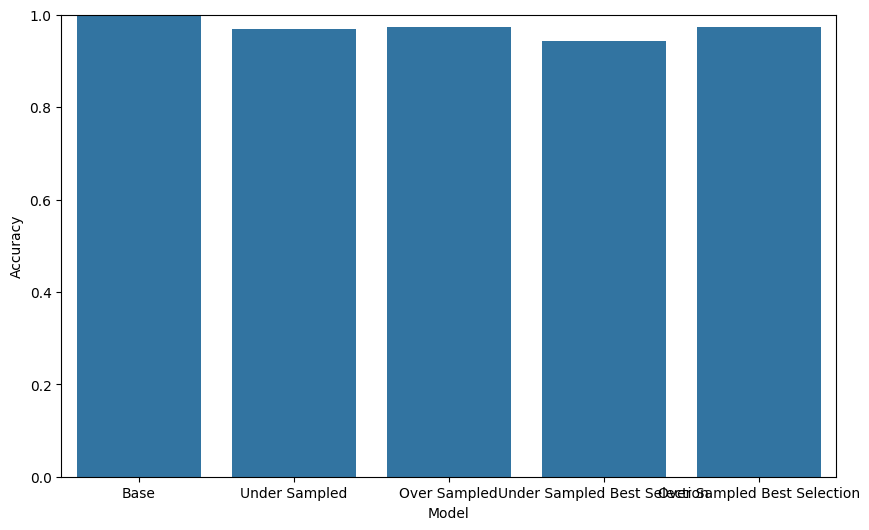

In [37]:
# Load the base model
base_model = joblib.load(f'{output_dir}/base/model.pkl')

# Load the under sampled model
under_sampled_model = joblib.load(f'{output_dir}/under_sampled_no_selection/model.pkl')

# Load the over sampled model
over_sampled_model = joblib.load(f'{output_dir}/over_sampled_no_selection/model.pkl')

# Load the under sampled best selection model
under_sampled_best_model = joblib.load(f'{output_dir}/under_sampled_best_selection/model.pkl')

# Load the over sampled best selection model
over_sampled_best_model = joblib.load(f'{output_dir}/over_sampled_best_selection/model.pkl')

# Predict the test set
base_y_pred = base_model.predict(X_test)
under_sampled_y_pred = under_sampled_model.predict(X_test)
over_sampled_y_pred = over_sampled_model.predict(X_test)
under_sampled_best_y_pred = under_sampled_best_model.predict(under_sampled_best_X_test)
over_sampled_best_y_pred = over_sampled_best_model.predict(over_sampled_best_X_test)

# Calculate the accuracy
base_accuracy = np.mean(base_y_pred == y_test)
under_sampled_accuracy = np.mean(under_sampled_y_pred == y_test)
over_sampled_accuracy = np.mean(over_sampled_y_pred == y_test)
under_sampled_best_accuracy = np.mean(under_sampled_best_y_pred == y_test)
over_sampled_best_accuracy = np.mean(over_sampled_best_y_pred == y_test)

# Create a dataframe
df = pd.DataFrame({
    'Model': ['Base', 'Under Sampled', 'Over Sampled', 'Under Sampled Best Selection', 'Over Sampled Best Selection'],
    'Accuracy': [base_accuracy, under_sampled_accuracy, over_sampled_accuracy, under_sampled_best_accuracy, over_sampled_best_accuracy]
})

# Save the dataframe
df.to_csv(f'{output_dir}/accuracy.csv', index=False)

# Plot the accuracy
plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='Accuracy', data=df)

plt.ylim(0, 1)